## 0. Import Necessary Libraries

In [1]:
import glob
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load the Data

### 1.1. Create a list of files in the folder

In [2]:
file_list = glob.glob(os.path.join(os.getcwd(), "D:/Users/suuser/Desktop/Cesitli/SICSS/data/vaccine_tweets", "*.json"))

tweet_list = [s for s in file_list if "data_" in s]
user_list  = [s for s in file_list if "users_" in s]

### 1.2. Collect all .json files

In [3]:
tweet_data = []

for file_name in tweet_list:
    with open(file_name, encoding="utf8") as json_file:
        json_file = json.load(json_file)
        for data in json_file:
            tweet_data.append(data)
            

user_data = []

for file_name in user_list:
    with open(file_name, encoding="utf8") as json_file:
        json_file = json.load(json_file)
        for data in json_file['users']:
            user_data.append(data)

### 1.3. Convert to Pandas DataFrame

In [4]:
tweet_data = pd.DataFrame(tweet_data)
user_data = pd.DataFrame(user_data)

### 1.4. Drop Unnecessary Columns

In [6]:
tweet_data.drop(columns=['entities','context_annotations', 'referenced_tweets', 'conversation_id', 'source', 'attachments', 
                         'in_reply_to_user_id', 'withheld', 'geo'], inplace=True)


user_data.drop(columns=['protected','profile_image_url','pinned_tweet_id', 'url', 'entities', 'withheld'], inplace=True)

### 1.5. Change Column Names of user_data

In [18]:
user_data.columns = ['user_' + x for x in user_data.columns]

### 1.6. Merge tweet_data & user_data

In [35]:
df = tweet_data.merge(user_data.drop_duplicates('user_id'), how='left', left_on = 'author_id', right_on = 'user_id')
df.drop(columns=['user_id'], inplace=True)

### 1.7. Convert Associated Columns to Datetime

In [621]:
df.created_at = pd.to_datetime(df.created_at)
df.user_created_at = pd.to_datetime(df.user_created_at)

### 1.8. Save Data as .csv

In [37]:
df.to_csv('D:/Users/suuser/Desktop/Cesitli/SICSS/data/df.csv')

In [615]:
df = pd.read_csv('D:/Users/suuser/Desktop/Cesitli/SICSS/data/df_3.csv').drop(columns=['Unnamed: 0'])

## 2. Counting Things

### 2.1. Create Categorical Variables for Each Keyword

In [759]:
#Çin Aşısı
df.loc[df.text.str.lower().str.contains('cin asi|çin aşı|çın aşı|çin aşi|cın ası|cın aşı|çın aşi|çin asi|cin aşı'), 'cin_asi'] = 1

#Sinovac
df.loc[df.text.str.lower().str.contains('sinovac|sınovac|sınovaç|sinovaç|sinovak|sinowac|sınowac|sinovak|sınovak|coronavac|koronavac|koronavak|snovac'), 'sinovac'] = 1

#Alman Aşısı
df.loc[df.text.str.lower().str.contains('alman asi|alman aşı|alman aşi|almanasi|almanaşı'), 'alman_asi'] = 1

#Biontech
df.loc[df.text.str.lower().str.contains('biontech|bıontech|biontec|bıontec|biontek|bıontek|biyontek|bıyontek|bayontek|biyonteck|bıyonteck|bionteck'), 'biontech'] = 1

#Pfizer
df.loc[df.text.str.lower().str.contains('pfizer|pfızer|fayzır|fayzir|pifizer|fizer|pıfızer|pıfizer|pifızer|fızer|phizer'), 'pfizer'] = 1

#Gavur Aşısı
df.loc[df.text.str.lower().str.contains('gavur aşı|gavur aşi|gavur asi'), 'gavur_asi'] = 1

#Sputnik
df.loc[df.text.str.lower().str.contains('sputnik5|sputnikv|sputnik 5|sputnik v|sputnık5|sputnık 5|sputnıkv|sputnık v|sputnik bes|sputnikbes|sputnikbeş|sputnik beş|sputnık bes|suputnik'), 'sputnik'] = 1

#Rus Aşı
df.loc[df.text.str.lower().str.contains('rus asi|rus aşı|rus aşi|rus aşi'), 'rus_asi'] = 1

#mRNA
df.loc[df.text.str.lower().str.contains('mrna'), 'mrna'] = 1

In [751]:
df[['cin_asi', 'sinovac', 'alman_asi', 'biontech', 'pfizer', 'gavur_asi',
       'sputnik', 'rus_asi', 'mrna']] = 0

In [622]:
df['created_month'] = df.created_at.dt.to_period('m')

D:\Users\suuser\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


2021-06-22 23:55:45,126 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 23:55:45,129 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 23:55:45,260 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 23:55:45,267 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021

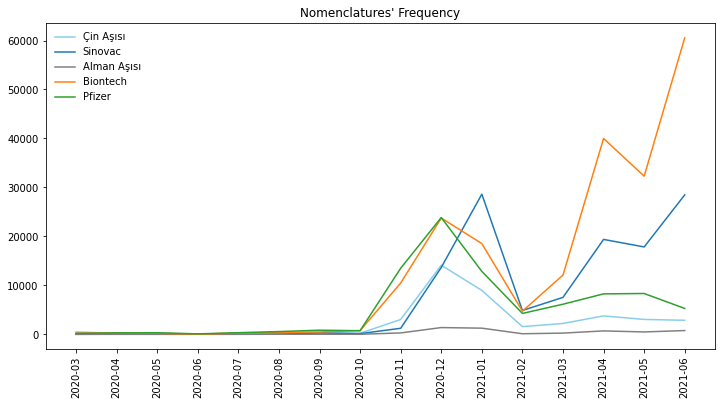

In [767]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

plt.plot(df.pivot_table(values=['biontech'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['biontech'], index='created_month', aggfunc='sum').reset_index().biontech, label='Biontech')

plt.plot(df.pivot_table(values=['sinovac'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['sinovac'], index='created_month', aggfunc='sum').reset_index().sinovac, label='Sinovac')

plt.plot(df.pivot_table(values=['pfizer'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['pfizer'], index='created_month', aggfunc='sum').reset_index().pfizer, label='Pfizer')

plt.plot(df.pivot_table(values=['cin_asi'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['cin_asi'], index='created_month', aggfunc='sum').reset_index().cin_asi, label='Çin Aşısı', c='skyblue')

plt.plot(df.pivot_table(values=['alman_asi'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['alman_asi'], index='created_month', aggfunc='sum').reset_index().alman_asi, label='Alman Aşısı', c='gray')

plt.plot(df.pivot_table(values=['rus_asi'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['rus_asi'], index='created_month', aggfunc='sum').reset_index().rus_asi, label='Rus Aşısı')

plt.plot(df.pivot_table(values=['sputnik'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['sputnik'], index='created_month', aggfunc='sum').reset_index().sputnik, label='Sputnik')

plt.title("Nomenclatures' Frequency")
plt.ylabel('Occurrence')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.legend(frameon=False)
plt.show()

In [768]:
df.to_csv(r'D:\Users\suuser\Desktop\Cesitli\SICSS\data\df_4.csv')

## 3. Preprocess the Text
1. Remove emojis
2. Tokenize using Zemberek and remove incomprehensible items in text
3. Replace punctuations with white space

### 3.1. Import Necessary Libraries and Define zemberek_tokenizer

In [130]:
import nltk
import string
import re

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

zemberek_tokenizer = TurkishTokenizer.DEFAULT

### 3.2. Define Preprocessing Functions

In [382]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

def text_preprocess(text):
    allowed_types = ['WordWithSymbol', 'Word', 'Punctuation', 'Number', 'UnknownWord']
    translator = str.maketrans(string.punctuation.replace('.','').replace('@',''), ' '*len(string.punctuation.replace('.','').replace('@','')))
    
#    text = deEmojify(text)
    text = " ".join([token.content for token in zemberek_tokenizer.tokenize(text) if token.type_.name in allowed_types])
    text = text.translate(translator)
    text = re.sub(' +', ' ', text)
    text = [word for word in text.split()]
    return " ".join(text)

### 3.3. Test the Preprocessing Function

In [311]:
number = 203060
text = text_preprocess(df.text[number])

print(df.text[number], "\n\n", text)

"En kötü aşı bile en iyi koronavirüs hastalığından iyidir"
Bilim Kurulu Üyesi Azap, mRNA aşılarına bağlı alerjik yan etkilerin diğer aşılara göre daha fazla olduğunu söyledi, 'Ancak en kötü aşı bile en iyi koronavirüs hastalığından iyidir' dedi

https://t.co/7I1gVJ8APB https://t.co/IUPlCHMSzA 

 En kötü aşı bile en iyi koronavirüs hastalığından iyidir Bilim Kurulu Üyesi Azap mRNA aşılarına bağlı alerjik yan etkilerin diğer aşılara göre daha fazla olduğunu söyledi Ancak en kötü aşı bile en iyi koronavirüs hastalığından iyidir dedi


### 3.4. Preprocess the Whole DF

In [387]:
df['processed_text'] = df.text.apply(lambda x: text_preprocess(x))

## 4. Sentiment Analysis

### 4.1. Model Comparison
We find that electra-turkish-sentiment-analysis works best in our scenario

In [640]:
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification, pipeline

tokenizer_1 = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-128k-cased")
model_1 = AutoModel.from_pretrained("dbmdz/bert-base-turkish-128k-cased")

sa_1 = pipeline("sentiment-analysis", tokenizer=tokenizer_1, model=model_1)

2021-06-22 23:00:03,171 - filelock - INFO
Msg: Lock 2486611252616 acquired on D:\Users\suuser/.cache\huggingface\transformers\38a5a8ddc3e95fba603eb96e9c7eba1cb825fcd90c61f35bcc1a44b08484984a.453a629e781b4c858049daeb69936fc02d2ee7e3314c6c65fa5f432c13470419.lock



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

2021-06-22 23:00:03,778 - filelock - INFO
Msg: Lock 2486611252616 released on D:\Users\suuser/.cache\huggingface\transformers\38a5a8ddc3e95fba603eb96e9c7eba1cb825fcd90c61f35bcc1a44b08484984a.453a629e781b4c858049daeb69936fc02d2ee7e3314c6c65fa5f432c13470419.lock

2021-06-22 23:00:04,352 - filelock - INFO
Msg: Lock 2486322627144 acquired on D:\Users\suuser/.cache\huggingface\transformers\f52dc533c970d010b6685abf9be0d77367ef97e77595e99cb2673e97530430b2.e646aa41d1f0edf09d11ce844dabd42390c858472dee78ff02e170878c5bf42e.lock



Downloading:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

2021-06-22 23:00:05,957 - filelock - INFO
Msg: Lock 2486322627144 released on D:\Users\suuser/.cache\huggingface\transformers\f52dc533c970d010b6685abf9be0d77367ef97e77595e99cb2673e97530430b2.e646aa41d1f0edf09d11ce844dabd42390c858472dee78ff02e170878c5bf42e.lock

2021-06-22 23:00:08,215 - filelock - INFO
Msg: Lock 2484754436616 acquired on D:\Users\suuser/.cache\huggingface\transformers\a1fa7c4d5ea5cb7b55379cd2cc9129b3f1b5af36cd1c13fa333c46f4deedfff0.c70618325b9fc2d2d041e439766d360b48a086a8841cc2896322f6b8aefc0225.lock



Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

2021-06-22 23:00:08,809 - filelock - INFO
Msg: Lock 2484754436616 released on D:\Users\suuser/.cache\huggingface\transformers\a1fa7c4d5ea5cb7b55379cd2cc9129b3f1b5af36cd1c13fa333c46f4deedfff0.c70618325b9fc2d2d041e439766d360b48a086a8841cc2896322f6b8aefc0225.lock

2021-06-22 23:00:10,382 - filelock - INFO
Msg: Lock 2484754524872 acquired on D:\Users\suuser/.cache\huggingface\transformers\d5362282eeb9df4e82256c6b656c9d0854592f64a9c875e87477675682008d1e.8847e304cf1d782802ee20b05c27077ce5d882811e29a4b291033a4028336579.lock



Downloading:   0%|          | 0.00/740M [00:00<?, ?B/s]

2021-06-22 23:02:17,079 - filelock - INFO
Msg: Lock 2484754524872 released on D:\Users\suuser/.cache\huggingface\transformers\d5362282eeb9df4e82256c6b656c9d0854592f64a9c875e87477675682008d1e.8847e304cf1d782802ee20b05c27077ce5d882811e29a4b291033a4028336579.lock



PipelineException: The model 'BertModel' is not supported for sentiment-analysis. Supported models are ['BigBirdForSequenceClassification', 'ConvBertForSequenceClassification', 'LEDForSequenceClassification', 'DistilBertForSequenceClassification', 'AlbertForSequenceClassification', 'CamembertForSequenceClassification', 'XLMRobertaForSequenceClassification', 'MBartForSequenceClassification', 'BartForSequenceClassification', 'LongformerForSequenceClassification', 'RobertaForSequenceClassification', 'SqueezeBertForSequenceClassification', 'LayoutLMForSequenceClassification', 'BertForSequenceClassification', 'XLNetForSequenceClassification', 'MobileBertForSequenceClassification', 'FlaubertForSequenceClassification', 'XLMForSequenceClassification', 'ElectraForSequenceClassification', 'FunnelForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'GPT2ForSequenceClassification', 'OpenAIGPTForSequenceClassification', 'ReformerForSequenceClassification', 'CTRLForSequenceClassification', 'TransfoXLForSequenceClassification', 'MPNetForSequenceClassification', 'TapasForSequenceClassification', 'IBertForSequenceClassification']

In [218]:
model_2 = AutoModelForSequenceClassification.from_pretrained("kuzgunlar/electra-turkish-sentiment-analysis")
tokenizer_2 = AutoTokenizer.from_pretrained("kuzgunlar/electra-turkish-sentiment-analysis")

sa_2 = pipeline("sentiment-analysis", tokenizer=tokenizer_2, model=model_2)

### 4.2. Define Sentiment Analyzer Function

We use electra-turkish-sentiment-analysis for this task (experiments)

In [369]:
def sentiment_analyzer(text):
    result = sa_2(text)
    
    if result[0]['score'] <= 0.7:
        sentiment = 0
    
    else:
        if result[0]['label'] == 'Positive':
            sentiment = 1

        else:
            sentiment = -1
            
    return sentiment

In [386]:
number = 203030

print(sentiment_analyzer(text_preprocess(df.text[number])))
print(text_preprocess(df.text[number]))
print(sa_2(text_preprocess(df.text[number])))

1
BioNTech ve Pfizer 2021 aşı üretim hedefini 2 milyar doza çıkardı
[{'label': 'Positive', 'score': 0.9812076091766357}]


### 4.3. Sentiment Analysis all DF

In [391]:
df['sentiment'] = df.processed_text.apply(lambda x: sentiment_analyzer(x))

In [566]:
for index, row in df_all.iterrows():
    if row.sentiment not in [-1,0,1]:
        df_all.loc[index, 'sentiment'] = sentiment_analyzer(df_all.loc[index].processed_text)

### 4.4. Trends for Positive - Neutral - Negative

2021-06-22 16:54:30,493 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 16:54:30,496 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



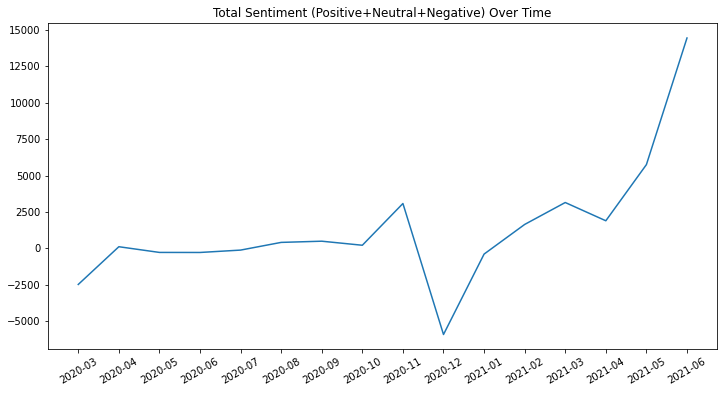

In [626]:
plt.figure(figsize=(12,6))

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.sentiment.values)

plt.title('Total Sentiment (Positive+Neutral+Negative) Over Time')
plt.xticks(rotation=30)

plt.show()

2021-06-22 12:41:10,001 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 12:41:10,001 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 12:41:10,116 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 12:41:10,116 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021

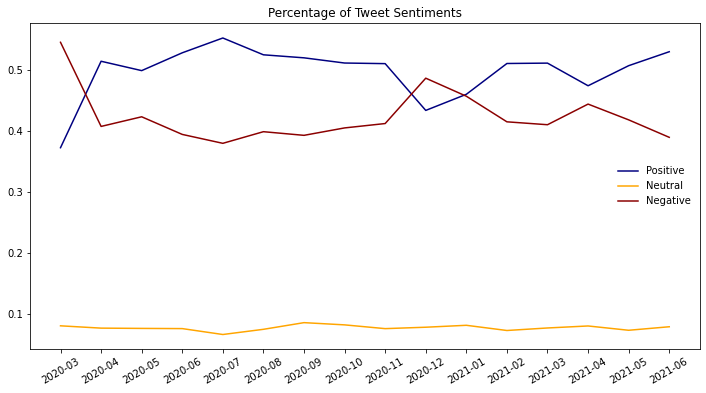

In [510]:
plt.figure(figsize=(12,6))

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         [*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[1]/df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count').sum(axis=1).values],
        label='Positive',
        c='navy')

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         [*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[0]/df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count').sum(axis=1).values],
         label='Neutral',
         c='orange')

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         [*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[-1]/df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count').sum(axis=1).values],
         label='Negative',
         c='darkred')

plt.title('Percentage of Tweet Sentiments')
plt.legend(frameon=False)
plt.xticks(rotation=30)

plt.show()

In [629]:
df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')

sentiment,-1.0,0.0,1.0
created_month,,,
2020-03,6241,861,3767
2020-04,3964,630,4078
2020-05,3010,459,2733
2020-06,2241,339,1961
2020-07,2455,334,2338
2020-08,3626,588,4037
2020-09,3787,722,4280
2020-10,3288,587,3503
2020-11,16154,2906,19233


In [633]:
[*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[1]]

[3767,
 4078,
 2733,
 1961,
 2338,
 4037,
 4280,
 3503,
 19233,
 42629,
 39052,
 13117,
 20272,
 41323,
 40705,
 57927]

2021-06-22 16:57:56,765 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 16:57:56,768 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 16:57:56,847 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 16:57:56,848 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021

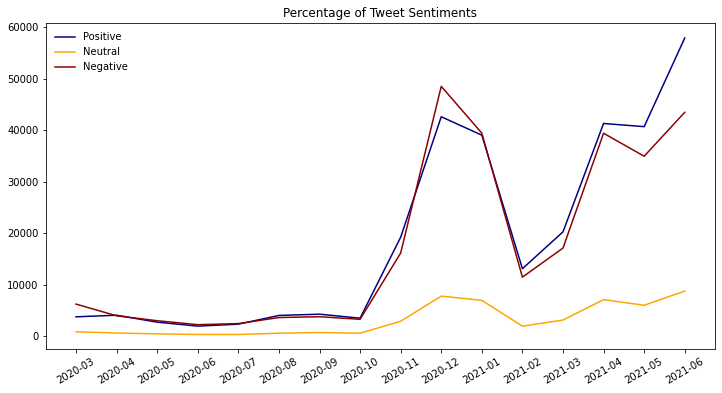

In [634]:
plt.figure(figsize=(12,6))

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         [*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[1]],
        label='Positive',
        c='navy')

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         [*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[0]],
         label='Neutral',
         c='orange')

plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.index.astype('str'),
         [*df.pivot_table(index = 'created_month', 
               columns='sentiment',
               values='id',
               aggfunc='count')[-1]],
         label='Negative',
         c='darkred')

plt.title('Sentiment Trend of Tweets about Vaccines')
plt.legend(frameon=False)
plt.xticks(rotation=30)

plt.show()

## 5. Investigating Media Channels

### BBC Türkçe

Biontech, Pfizer, Alman

In [571]:
len(df_all[(df_all.user_username=='bbcturkce') & ((df_all.processed_text.str.lower().str.contains('pfizer')) | (df_all.processed_text.str.lower().str.contains('biontech')) | (df_all.processed_text.str.lower().str.contains('alman')))])

178

Coronavac, Sinovac, Çin 

In [572]:
len(df_all[(df_all.user_username=='bbcturkce') & ((df_all.processed_text.str.lower().str.contains('coronavac')) | (df_all.processed_text.str.lower().str.contains('sinovac')) | (df_all.processed_text.str.lower().str.contains('çin')))])

146

### Sputnik TR

In [573]:
len(df_all[(df_all.user_username=='sputnik_TR') & ((df_all.processed_text.str.lower().str.contains('pfizer')) | (df_all.processed_text.str.lower().str.contains('biontech')) | (df_all.processed_text.str.lower().str.contains('alman')))])

328

In [574]:
len(df_all[(df_all.user_username=='sputnik_TR') & ((df_all.processed_text.str.lower().str.contains('coronavac')) | (df_all.processed_text.str.lower().str.contains('sinovac')) | (df_all.processed_text.str.lower().str.contains('çin')))])

308

In [584]:
media_chanels = ["TurkishIndy", "Irna_Turkish", "aawsat_turkce", "XHTurkey", "AIMonitorTurkce", "RudawTurkce",
                 "CRI_Turkish", "sputnik_TR", "euronews_tr", "AJTurk", "dw_turkce", "bbcturkce", "VOATurkish"]

In [635]:
df_media = df.loc[(df.user_username.isin(media_chanels)) & (df.user_verified == True)].reset_index(drop=True)

### 5.1. Mean Sentiment for All Vaccines

In [636]:
df_media[(df_media.sinovac==1) | (df_media.cin_asi==1)].pivot_table(values='sentiment', columns = 'user_username', aggfunc='mean')

user_username,CRI_Turkish,RudawTurkce,TurkishIndy,VOATurkish,XHTurkey,aawsat_turkce,bbcturkce,dw_turkce,euronews_tr,sputnik_TR
sentiment,0.672131,0.585366,0.395862,0.62931,0.679245,0.671598,0.611399,0.705056,0.544974,0.549171


In [637]:
df_media[(df_media.biontech==1) | (df_media.pfizer==1) | (df_media.alman_asi==1)].pivot_table(values='sentiment', columns = 'user_username', aggfunc='mean')

user_username,CRI_Turkish,RudawTurkce,TurkishIndy,VOATurkish,XHTurkey,aawsat_turkce,bbcturkce,dw_turkce,euronews_tr,sputnik_TR
sentiment,0.782609,0.736842,0.408669,0.84127,0.875,0.810427,0.693182,0.878453,0.621849,0.605769


## 6. Morphological Analysis

In [827]:
import zeyrek
import logging

analyzer = zeyrek.MorphAnalyzer()

#This one suppresses the warnings
logging.getLogger().setLevel(logging.ERROR)

In [798]:
def pronoun_finder(text):
    sentence = analyzer.analyze(text)
    pronouns = []
    for word in sentence:
        if len(word)>=1:
            if word[0].pos == 'Verb':
g
                if   ('A1sg' in word[0][-1]) | ('A1pl' in word[0][-1]):
                    pronouns.append(1)
                elif ('A2sg' in word[0][-1]) | ('A2pl' in word[0][-1]):
                    pronouns.append(2)
                elif ('A3sg' in word[0][-1]) | ('A3pl' in word[0][-1]):
                    pronouns.append(3)

    return pronouns

In [837]:
df['pronoun'] = None

In [843]:
import tqdm

In [874]:
for index, row in df.iterrows():
    if index % 100 == 0:
        print(index)
    if df.loc[index].pronoun == None:
        try:
            df.loc[index, 'pronoun'] = str(pronoun_finder(row.processed_text))
        except AttributeError:
            pass
    else:
        pass

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

250100
250200
250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300

MemoryError: Unable to allocate 4.80 MiB for an array with shape (629334,) and data type object

In [876]:
df.to_csv(r'D:\Users\suuser\Desktop\Cesitli\SICSS\data\df_5.csv')